# Plot heatmap and logo of CDDM

## Setup

In [ ]:
import pandas as pd
import numpy as np
from katlas.data import *
from katlas.plot import *
from katlas.pssm import *
from katlas.feature import *
from matplotlib import pyplot as plt
import seaborn as sns
import math

from sklearn.cluster import KMeans

In [ ]:
df = Data.get_ks_dataset()

In [ ]:
df.head()

,kin_sub_site,kinase_uniprot,substrate_uniprot,site,source,substrate_genes,substrate_phosphoseq,position,site_seq,sub_site,substrate_sequence,kinase_on_tree,kinase_genes,kinase_group,kinase_family,kinase_pspa_big,kinase_pspa_small,kinase_coral_ID,num_kin
0,O00141_A4FU28_S140,O00141,A4FU28,S140,Sugiyama,CTAGE9,MEEPGATPQPYLGLVLEELGRVVAALPESMRPDENPYGFPSELVVC...,140,AAAEEARSLEATCEKLSRsNsELEDEILCLEKDLKEEKSKH,A4FU28_S140,MEEPGATPQPYLGLVLEELGRVVAALPESMRPDENPYGFPSELVVC...,1,SGK1 SGK,AGC,SGK,Basophilic,Akt/rock,SGK1,22
1,O00141_O00141_S252,O00141,O00141,S252,Sugiyama,SGK1 SGK,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,252,SQGHIVLTDFGLCKENIEHNsTtstFCGtPEyLAPEVLHKQ,O00141_S252,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,1,SGK1 SGK,AGC,SGK,Basophilic,Akt/rock,SGK1,1
2,O00141_O00141_S255,O00141,O00141,S255,Sugiyama,SGK1 SGK,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,255,HIVLTDFGLCKENIEHNsTtstFCGtPEyLAPEVLHKQPYD,O00141_S255,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,1,SGK1 SGK,AGC,SGK,Basophilic,Akt/rock,SGK1,1
3,O00141_O00141_S397,O00141,O00141,S397,Sugiyama,SGK1 SGK,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,397,sGPNDLRHFDPEFTEEPVPNsIGKsPDsVLVTAsVKEAAEA,O00141_S397,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,1,SGK1 SGK,AGC,SGK,Basophilic,Akt/rock,SGK1,1
4,O00141_O00141_S404,O00141,O00141,S404,Sugiyama,SGK1 SGK,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,404,HFDPEFTEEPVPNsIGKsPDsVLVTAsVKEAAEAFLGFsYA,O00141_S404,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,1,SGK1 SGK,AGC,SGK,Basophilic,Akt/rock,SGK1,1


In [ ]:
df.shape

(187066, 19)

## logo heatmap

In [ ]:
df['kinase_uniprot_gene'] = df['kinase_uniprot']+'_'+df['kinase_genes'].str.split(' ').str[0]

In [ ]:
cnt = df.kinase_uniprot_gene.value_counts()

In [ ]:
cnt20 = cnt[cnt>20]

In [ ]:
cnt20

kinase_uniprot_gene
P12931_SRC        2429
P29320_EPHA3      1935
P07332_FES        1903
Q16288_NTRK3      1824
Q9UM73_ALK        1794
                  ... 
Q9BUB5_MKNK1        24
Q9BWU1_CDK19        23
Q12852_MAP3K12      22
P37173_TGFBR2       21
Q09013_DMPK         21
Name: count, Length: 352, dtype: int64

In [ ]:
len(cnt20)

352

In [ ]:
def convert_source(x):
    if x == "Sugiyama":
        return x
    elif 'Sugiyama' in x and '|' in x:
        return 'Both'
    elif 'Sugiyama' not in x:
        return 'Non-Sugiyama'

In [ ]:
df['source_combine'] = df.source.apply(convert_source)

In [ ]:
def plot_hist_num_kin(df_k):
    "Plot histogram of num kin grouped by source_combine."
    g = sns.displot(
        df_k,
        x="num_kin",
        col="source_combine",
        bins=100,
        col_wrap=1,
        height=2.0,
        aspect=4,
        facet_kws={'sharex': False, 'sharey': False}
    )
    
    g.set_axis_labels("Number of Kinases per Site", "Count")
    
    # Customize titles
    for ax, source in zip(g.axes.flatten(), g.col_names):
        count = df_k[df_k['source_combine'] == source].shape[0]
        ax.set_title(f"{source} (n={count:,})")
    
    g.figure.suptitle("Histogram of # Kinases per Substrate Site")
    
    # Adjust layout to make room for suptitle
    plt.tight_layout()

In [ ]:
def save_show(path=None, # image path, e.g., img.svg, if not None, will save, else plt.show()
             ):
    "Show plot or save path"
    plt.savefig(path,bbox_inches='tight', pad_inches=0.05) if path is not None else plt.show()
    plt.close()

In [ ]:
def plot_hist_cddm(df_k,path=None):
    plot_hist_num_kin(df_k)
    
    save_show(path)

In [ ]:
# plot_hist_cddm(df_k)

In [ ]:
def plot_cnt_cddm(df_k,path=None):
    "Plot source combine counts via bar graph."
    source_cnt = df_k.source_combine.value_counts()
    plot_cnt(source_cnt)
    plt.title('# Kinase-Substrate Pairs per Source',pad=20)
    save_show(path)

In [ ]:
# plot_cnt_cddm(df_k)

In [ ]:
# set_sns()

In [ ]:
# onehot = onehot_encode(df_k.site_seq)

In [ ]:
def kmeans(onehot,n=2,seed=42):
    kmeans = KMeans(n_clusters=n, random_state=seed,n_init='auto')
    return kmeans.fit_predict(onehot)

In [ ]:
def filter_range_columns(df,low=-10,high=10):
    positions = df.columns.str[:-1].astype(int)
    mask = (positions >= low) & (positions <= high)
    return df.loc[:,mask]

In [ ]:
# positions = onehot.columns.str[:-1].astype(int)
# mask = (positions >= -10) & (positions <= 10)

# onehot = onehot.loc[:,mask]

# df_k['cluster'] = kmeans(onehot,n=10,seed=42)

# pssms = get_cluster_pssms(df_k,'cluster',valid_thr=0.5)

# kmeans_cnt = df_k.cluster.value_counts()

In [ ]:
def plot_logos(pssms_df, count_dict=None, path=None):
    """
    Plot all logos from a dataframe of flattened PSSMs as subplots in a single figure.
    Save the full figure as an SVG.
    """
    n = len(pssms_df)
    hspace=0.7
    # 14 is width, 1 is height for each logo
    fig, axes = plt.subplots(nrows=n, figsize=(14, n * (1+hspace)),gridspec_kw={'hspace': hspace+0.1})

    if n == 1:
        axes = [axes]  # ensure axes is iterable

    for ax, idx in zip(axes, pssms_df.index):
        pssm = recover_pssm(pssms_df.loc[idx])
        if count_dict is not None:
            plot_logo(pssm, title=f'Motif {idx} (n={count_dict[idx]:,})',ax=ax)
        else:
            plot_logo(pssm, title=f'Motif {idx}',ax=ax)
    save_show(path=path)

In [ ]:
# plot_logos(pssms,kmeans_cnt)

In [ ]:
def get_onehot_add_cluster(df_k,n=10):
    df_k = df_k.copy()
    onehot = onehot_encode(df_k.site_seq)
    onehot_10 = filter_range_columns(onehot)
    df_k['cluster'] = kmeans(onehot_10,n=n,seed=42)
    df_k = df_k.reset_index(drop=True)
    return df_k,onehot_10

In [ ]:
# df_k,onehot_10 = get_onehot_add_cluster(df_k,n=10)

In [ ]:
def get_kmeans_logos(df_k,path=None):
    pssms = get_cluster_pssms(df_k,'cluster',valid_thr=0.5)
    kmeans_cnt = df_k.cluster.value_counts()
    plot_logos(pssms,kmeans_cnt,path=path)

In [ ]:
# df_k,onehot_10 = get_onehot_add_cluster(df_k,n=10)
# get_kmeans_logos(df_k)

In [ ]:
def plot_onehot(onehot_10,hue,path=None):
    plot_cluster(onehot_10,'pca',seed=42,complexity=30,hue=hue,legend=True,s=8)
    plt.title('PCA of One-Hot Encoded Site Sequences (Position -10 to +10)')
    save_show(path)

In [ ]:
# df_k,onehot_10 = get_onehot_add_cluster(df_k,n=10)
# plot_onehot(onehot_10,df_k.cluster)
# get_kmeans_logos(df_k)

In [ ]:
# plot_cluster(onehot_10,'pca',seed=42,complexity=30,hue=df_k.cluster,legend=True,s=8)
# plt.title('PCA of One-Hot Encoded Sequences (-10 to +10')

In [ ]:
# plot_logo_heatmap(pssm_df,title=f'{k} (n={len(df_k):,})',figsize=(17,10))


In [ ]:
from katlas.utils import *

In [ ]:
df['acceptor']=df.site.str[0]

In [ ]:
# for site_type in ['S','T','Y']:
#     df_sty = df[df.kinase_uniprot_gene.upper()==site_type].copy()
#     pssm_sty = get_prob(df_sty,'site_seq')
#     plot_logo_heatmap(pssm_sty,title=f'{site_type} sites (n={len(df_sty):,})',figsize=(17,10))
#     save_show()

In [ ]:
pssm_sty

In [ ]:
def get_pssm_LO(pssm_df,
                site_type, # S, T or Y
               ):
    "Get log2 (freq pssm/background pssm) --> log odds."
    bg_pssms = Data.get_ks_background()
    flat_bg = bg_pssms.loc[f'ks_{site_type.upper()}']
    pssm_bg = recover_pssm(flat_bg)
    pssm_odds = ((pssm_df+1e-5)/(pssm_bg+1e-5)).dropna(axis=0,how='all').dropna(axis=1, how='all')
    # return pssm_odds
    # make sure all columns and index matched
    assert pssm_odds.shape == pssm_df.shape
    return np.log2(pssm_odds).replace([np.inf, -np.inf], 0).fillna(0)

In [ ]:
pssm_LO = get_pssm_LO(pssm_sty,'S')

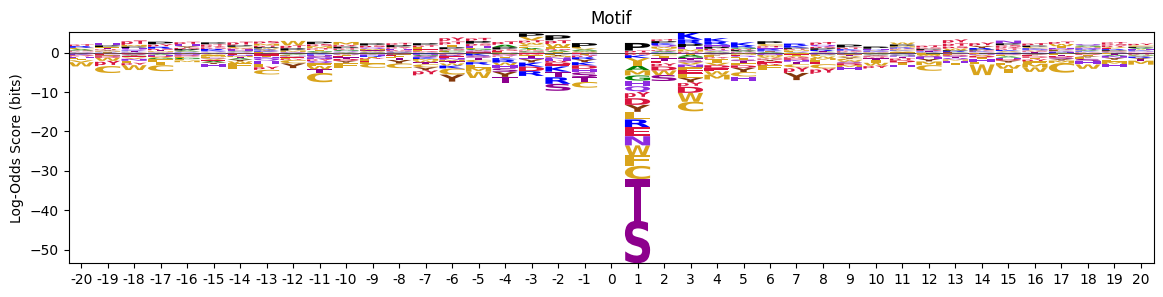

In [ ]:
plot_logo_raw(pssm_LO,ytitle="Log-Odds Score (bits)")

In [ ]:
def plot_logo_heatmap_enrich(pssm_df, # column is position, index is aa
                       title='Motif',
                       figsize=(17,10),
                       include_zero=False
                      ):
    
    """Plot logo and heatmap vertically"""
    
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 5], width_ratios=[4, 1], hspace=0.11, wspace=0)

    ax_logo = fig.add_subplot(gs[0, 0])
    
    plot_logo_raw(pssm_df,ytitle="Log-Odds (bits)",ax=ax_logo,title=title)

    ax_heatmap = fig.add_subplot(gs[1, :])
    plot_heatmap(pssm_df,ax=ax_heatmap,position_label=False,include_zero=include_zero)

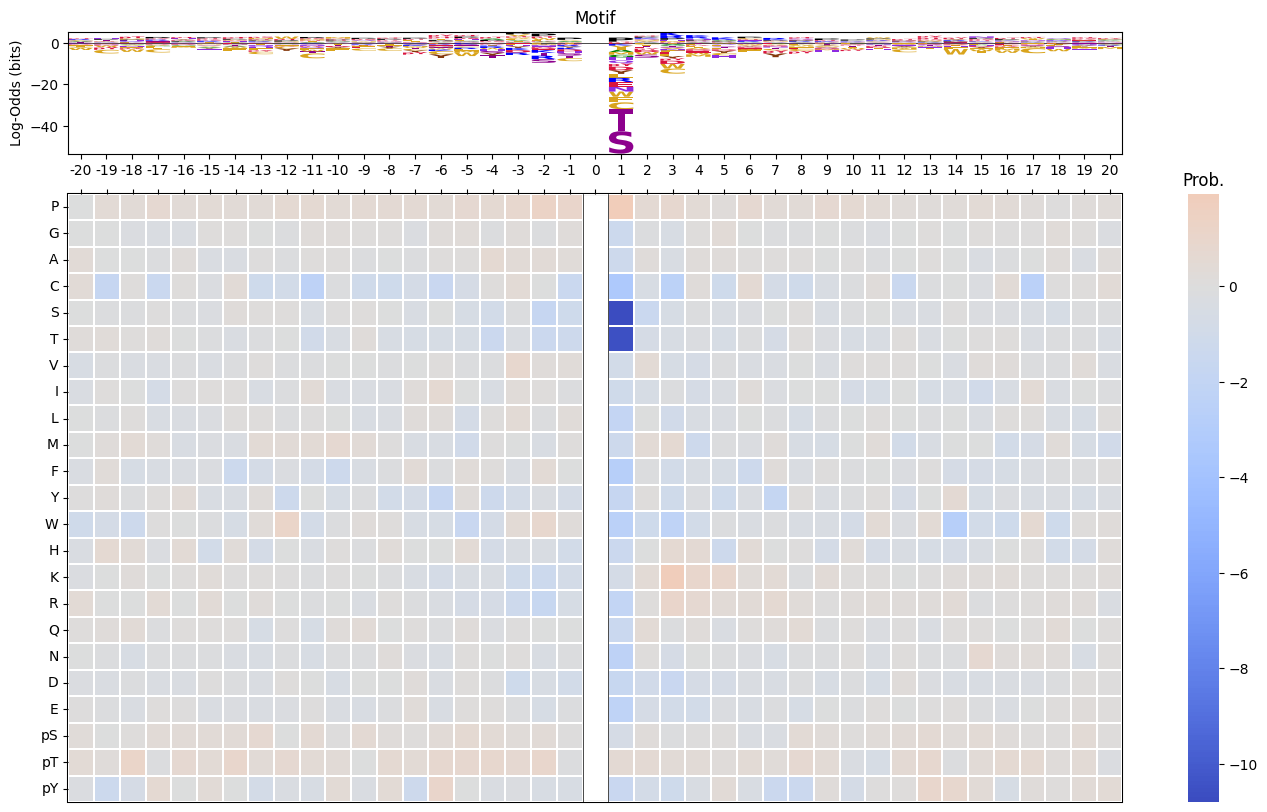

In [ ]:
plot_logo_heatmap_enrich(pssm_LO)

In [ ]:
import logomaker

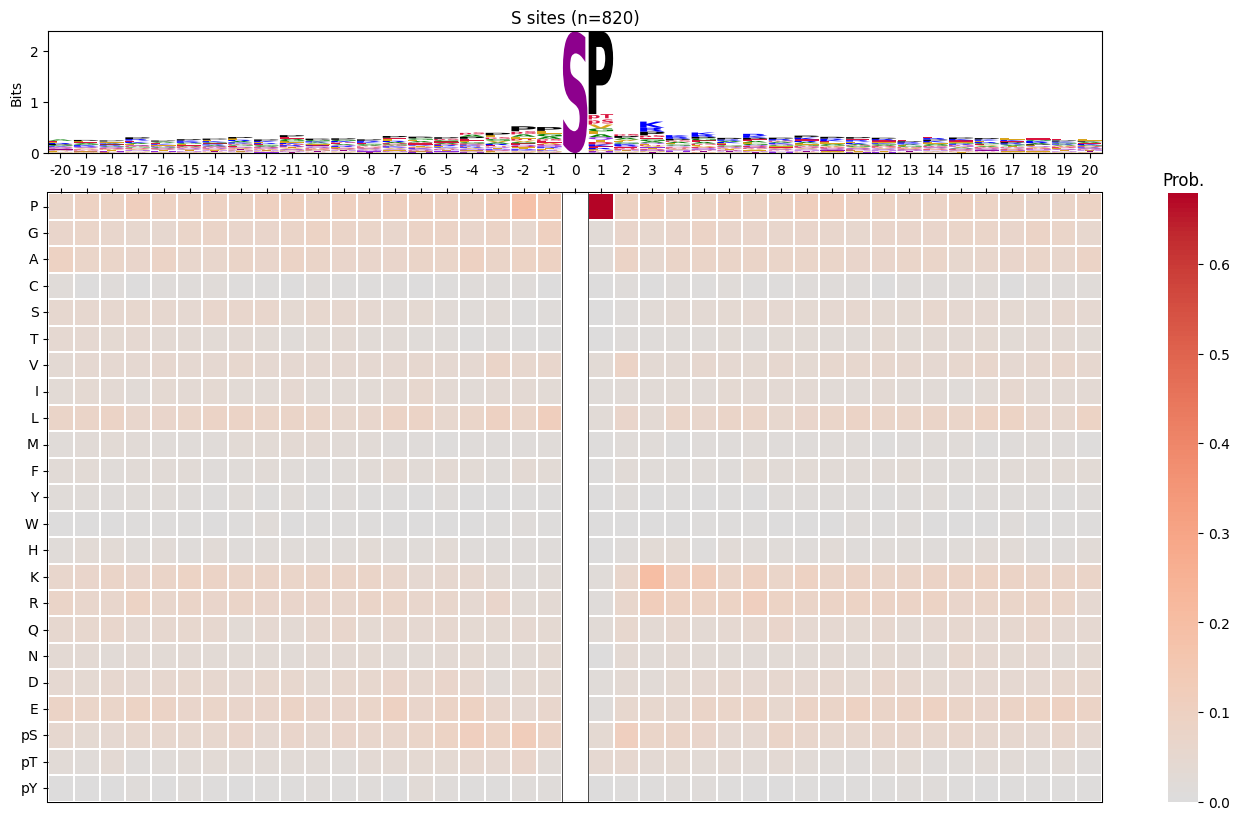

In [ ]:
for site_type in ['S','T','Y']:
    df_sty = df_k[df_k.acceptor.str.upper()==site_type].copy()
    pssm_sty = get_prob(df_sty,'site_seq')
    plot_logo_heatmap(pssm_sty,title=f'{site_type} sites (n={len(df_sty):,})',figsize=(17,10))
    save_show()
    break

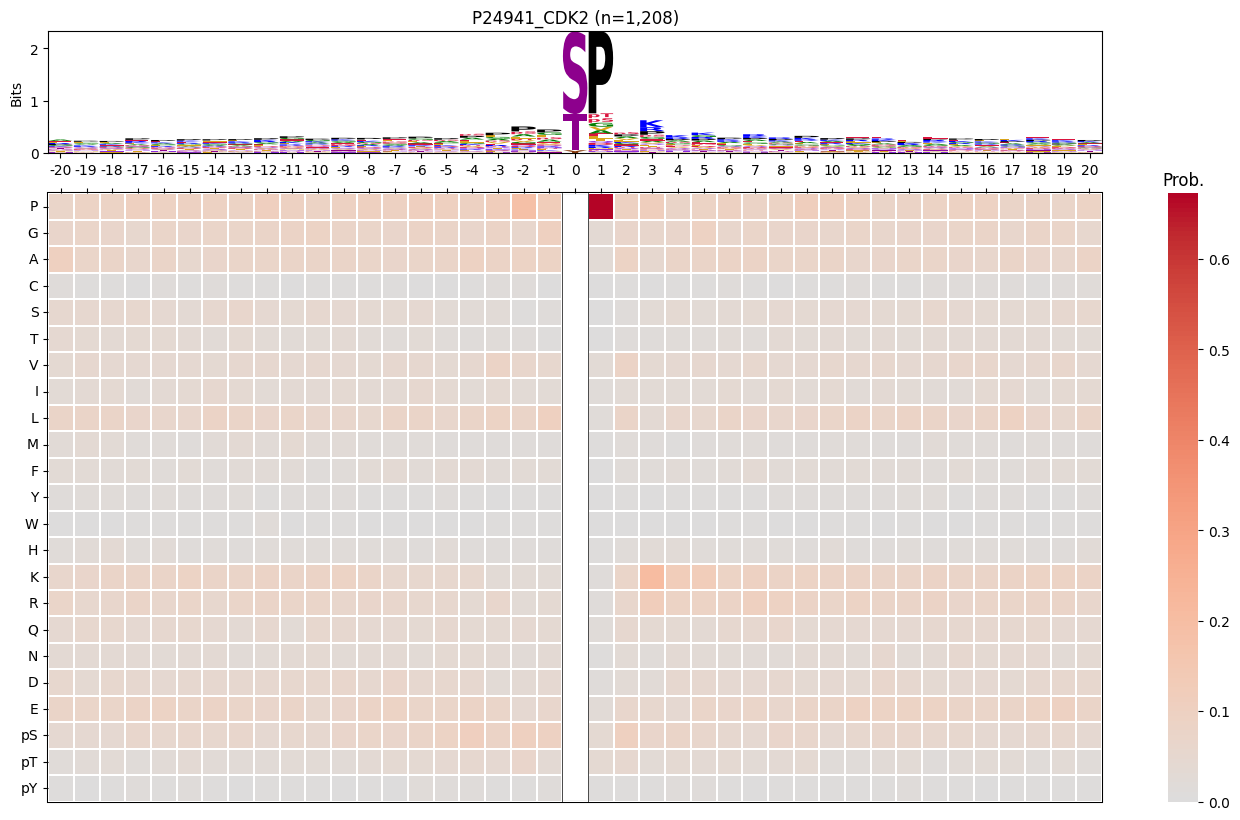

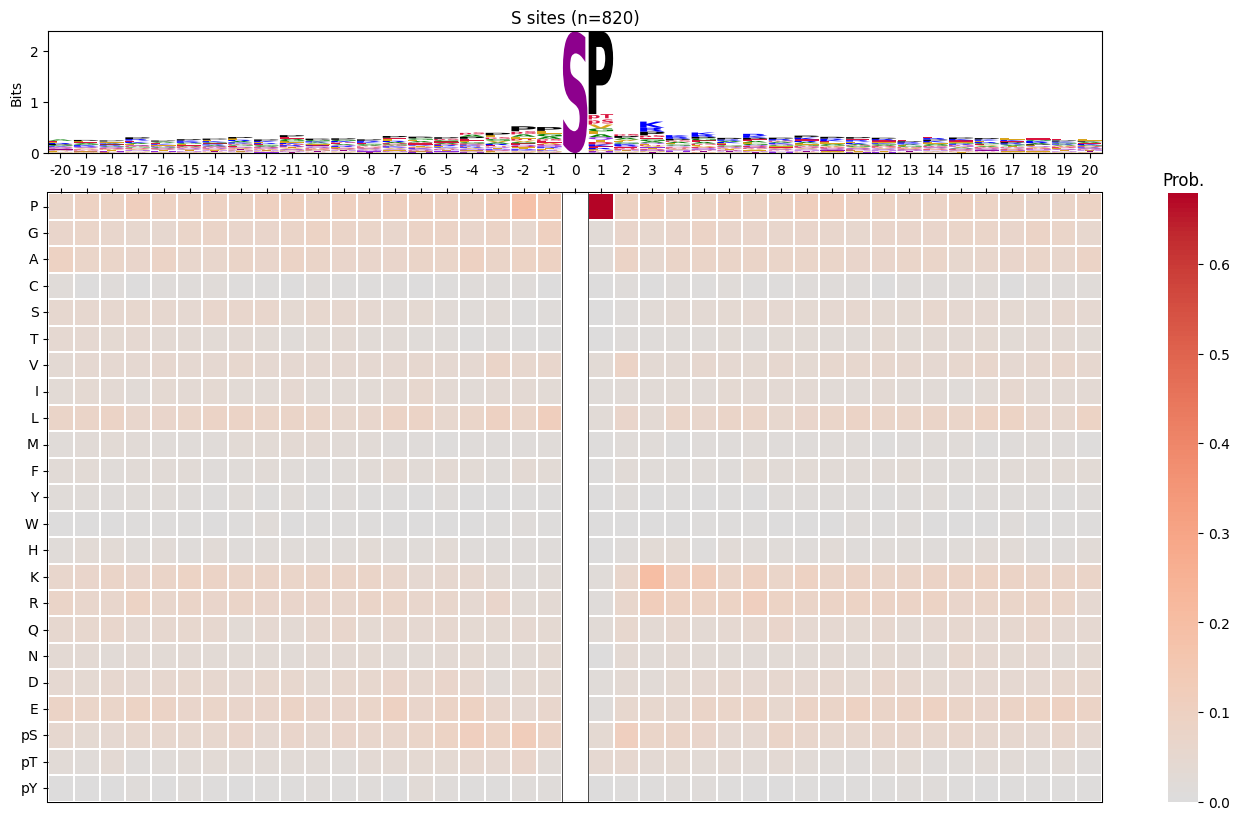

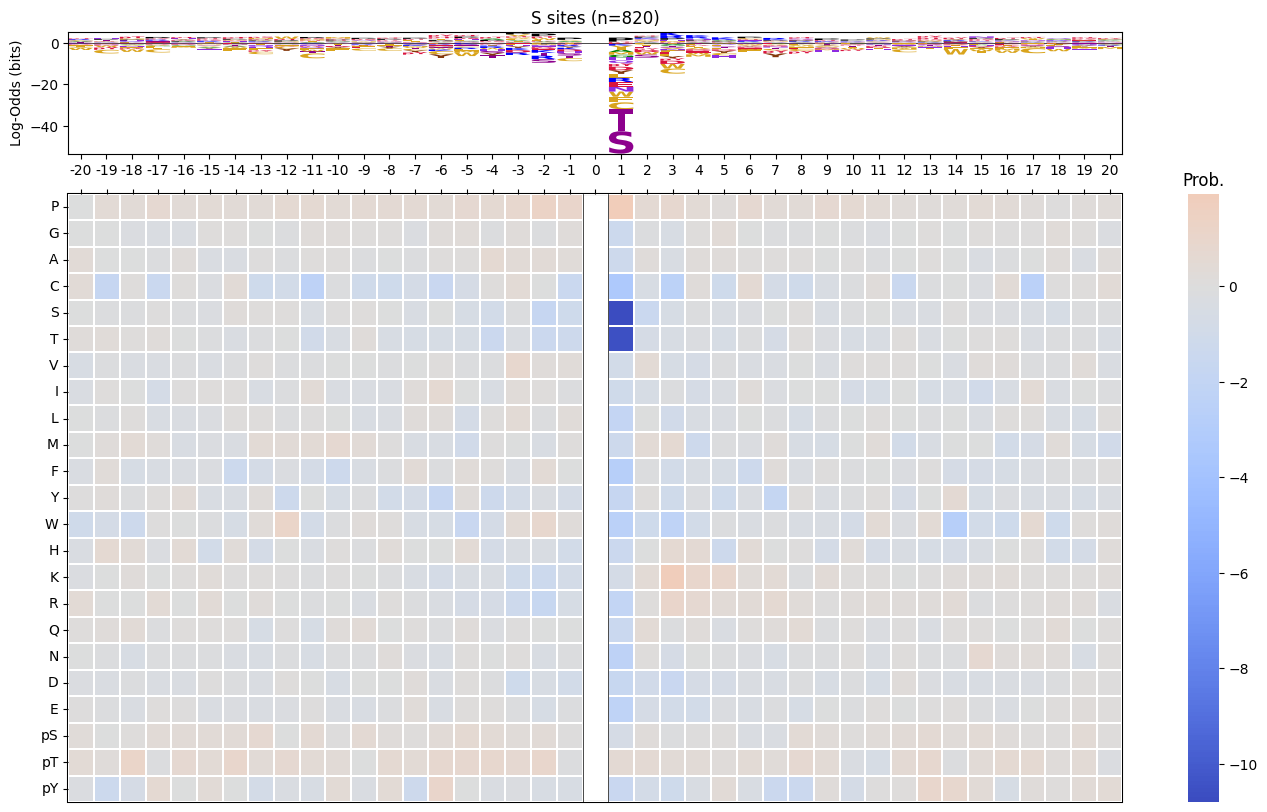

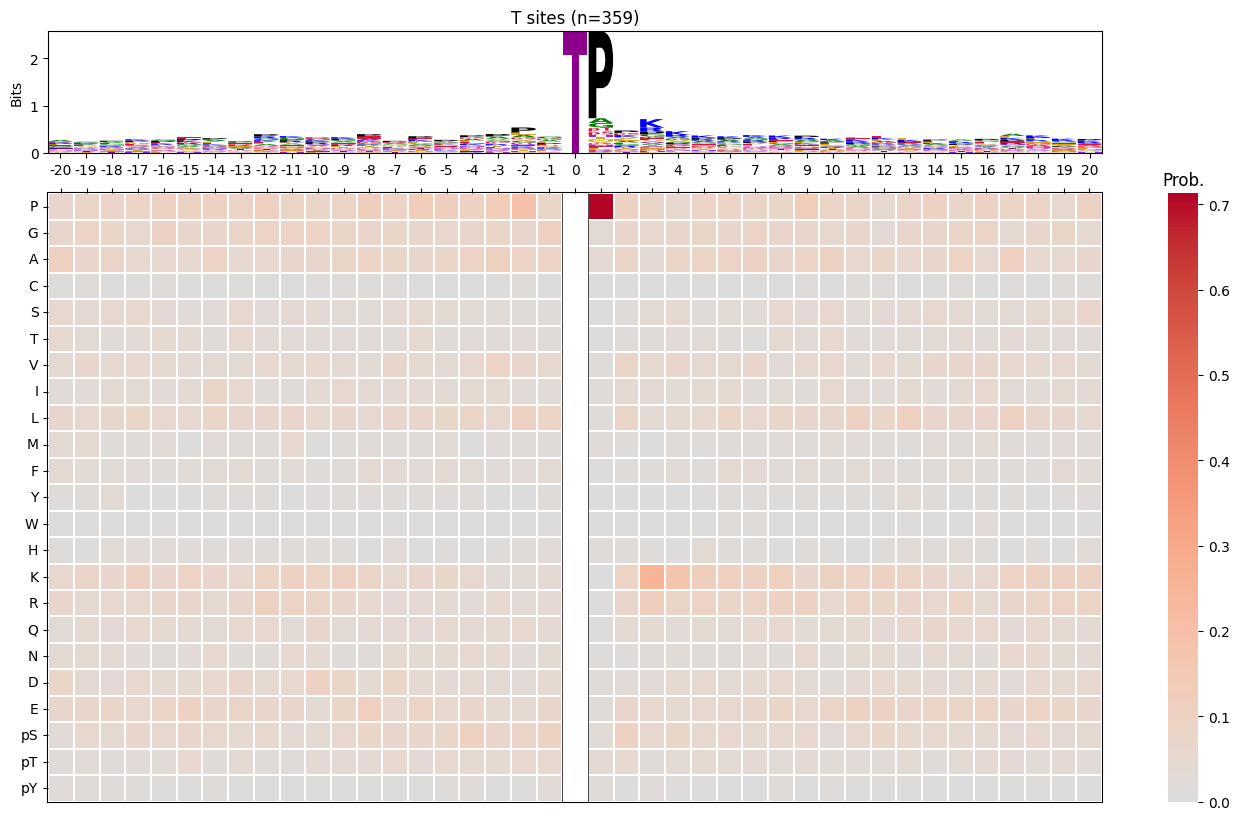

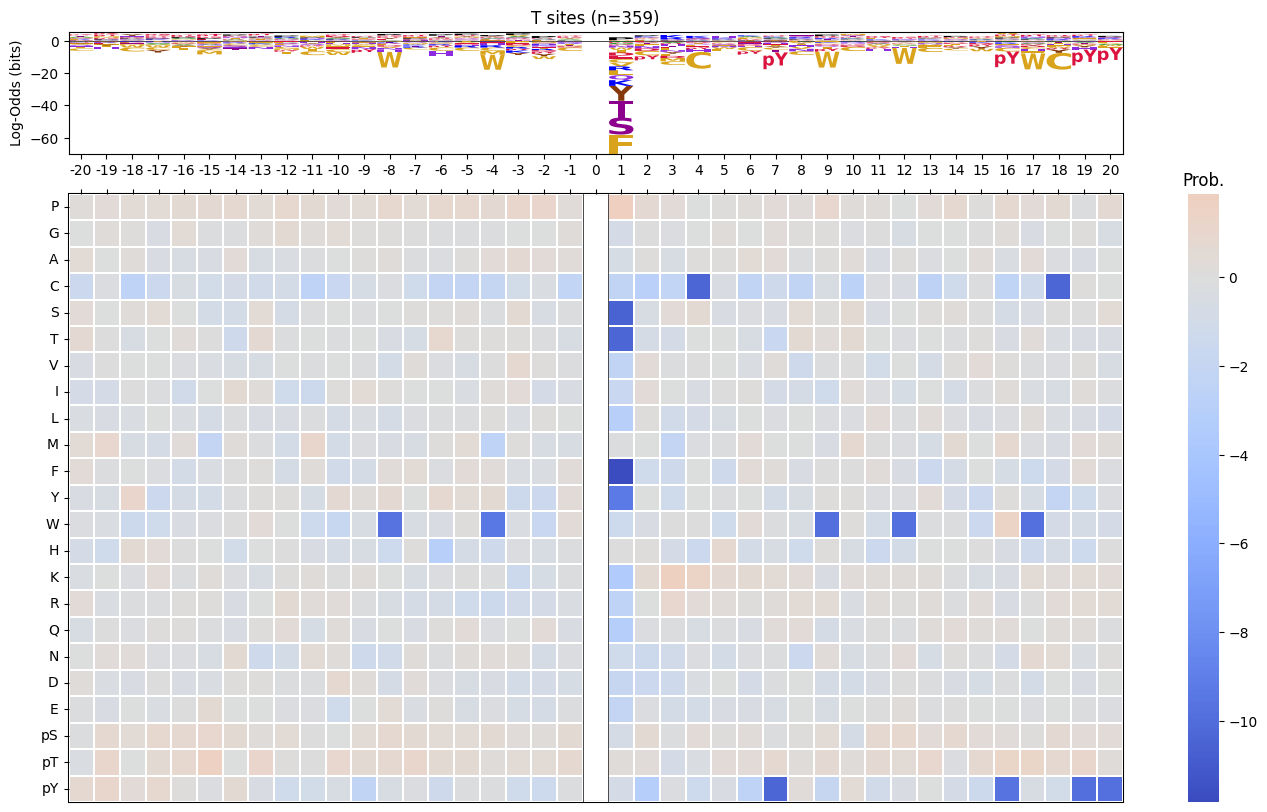

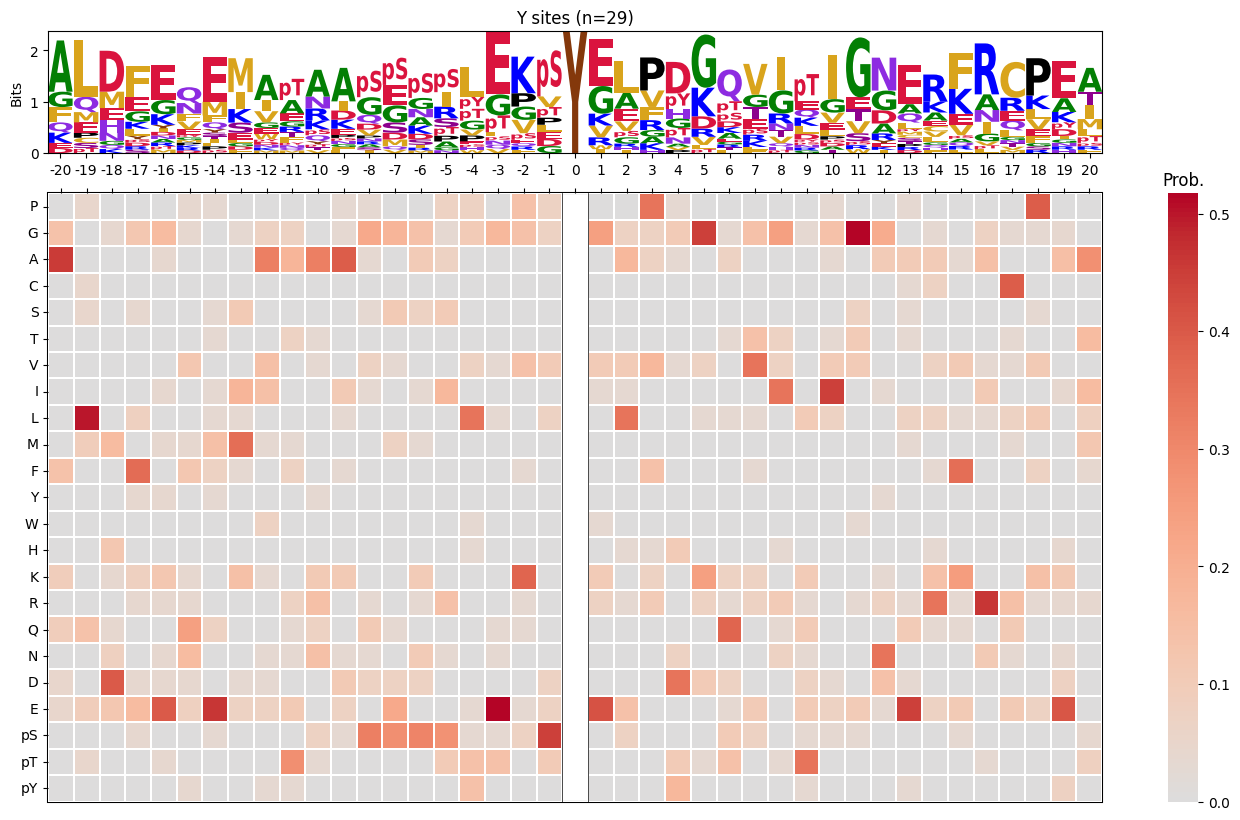

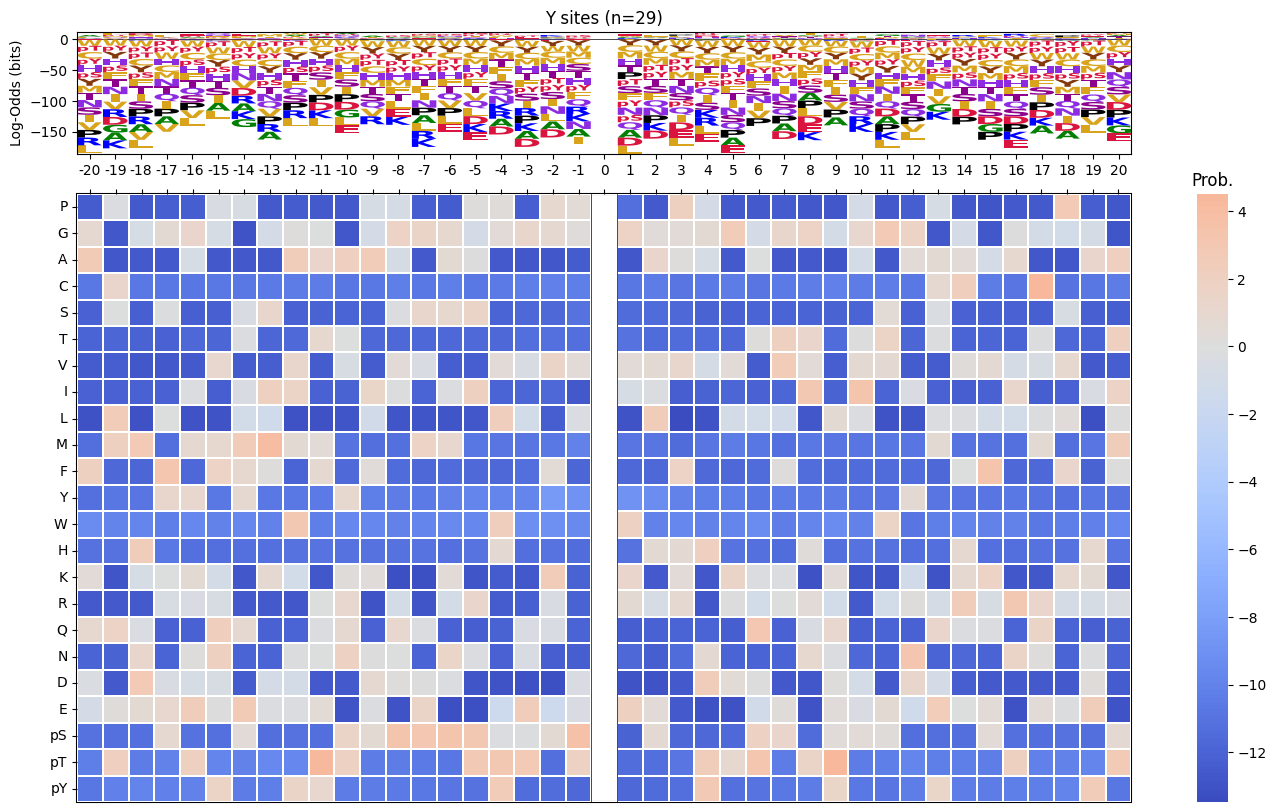

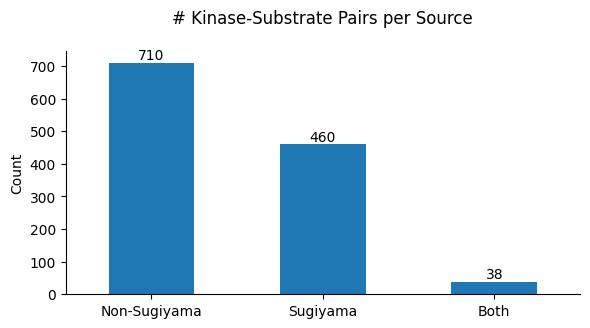

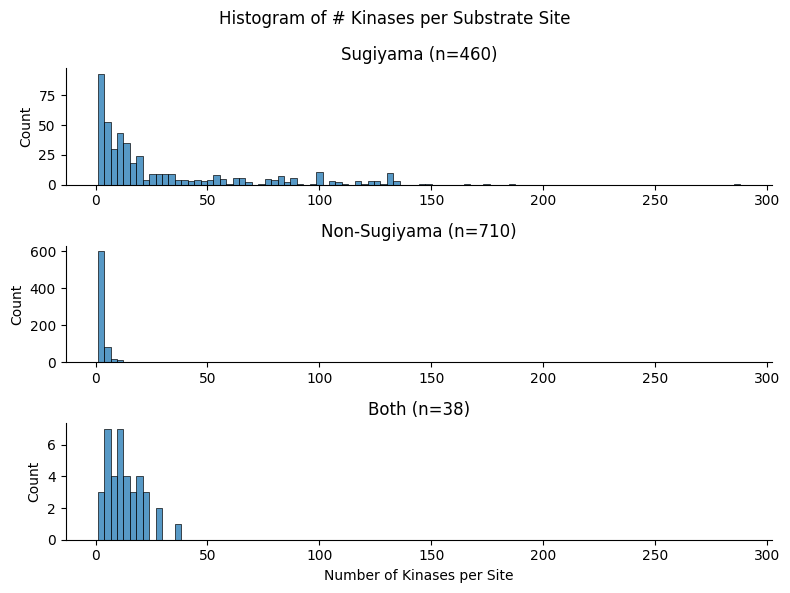

In [ ]:

for k in cnt20[40:].index: 
    df_k = df[df.kinase_uniprot_gene==k].copy()
    # df_k = df_k[df_k.num_kin>10]
    pssm_df = get_prob(df_k,'site_seq')

    # logo heatmap
    plot_logo_heatmap(pssm_df,title=f'{k} (n={len(df_k):,})',figsize=(17,10))
    path_logo_heatmap=get_path('~/img/cddm/logo_heatmap',f'{k}.svg')
    # save_show(path_logo_heatmap)
    save_show()

    # plot S, T and Y motif
    sty_cnt =df.acceptor.value_counts()
    for site_type in sty_cnt.index:
        df_sty = df_k[df_k.acceptor.str.upper()==site_type].copy()

        # freq map
        pssm_sty = get_prob(df_sty,'site_seq')
        plot_logo_heatmap(pssm_sty,title=f'{site_type} sites (n={len(df_sty):,})',figsize=(17,10))
        save_show()

        # for log-odds
        pssm_LO = get_pssm_LO(pssm_sty,site_type)
        plot_logo_heatmap_enrich(pssm_LO,title=f'{site_type} sites (n={len(df_sty):,})',figsize=(17,10))
        save_show()

    

    # count of source
    path_cnt=get_path('~/img/cddm/cnt',f'{k}.svg')
    # plot_cnt_cddm(df_k,path_cnt)
    plot_cnt_cddm(df_k)

    # histogram of num kin
    path_hist=get_path('~/img/cddm/hist',f'{k}.svg')
    # plot_hist_cddm(df_k,path_hist)
    plot_hist_cddm(df_k)

    
    

    # # onehot of sequences
    # df_k,onehot_10 = get_onehot_add_cluster(df_k,n=10)
    # path_pca= get_path('~/img/cddm/pca',f'{k}.svg')
    # # plot_onehot(onehot_10,df_k.cluster,path_pca)
    # plot_onehot(onehot_10,df_k.cluster)

    # path_klogo= get_path('~/img/cddm/klogo',f'{k}.svg')
    # # get_kmeans_logos(df_k,path_klogo)
    # get_kmeans_logos(df_k)
    
    break

In [ ]:
# df_k.source.value_counts()

In [ ]:
means = np.array([a.mean() for a in arrays])
im_sw = 1 - (means - means.min()) / (means.max() - means.min())

inverse mean

In [ ]:
def get_im(values): return 

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

from katlas.core import *
from katlas.plot import *

from scipy.stats import spearmanr, pearsonr

import os
from PIL import Image
from tqdm import tqdm

In [ ]:
def plot_count(df_k,title):
    # Get value counts
    source_counts = df_k.source.replace({'pplus':'PP','large_scale':'LS'}).value_counts()
    plt.figure(figsize=(7,1))

    source_counts.plot(kind='barh', stacked=True, color=['darkred', 'darkblue'])
    # Annotate with the actual values
    for index, value in enumerate(source_counts):
        plt.text(value, index, str(value),fontsize=10,rotation=-90, va='center')

    plt.xlabel('Count')
    plt.title(title)

In [ ]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

## Load data

In [ ]:
df = Data.get_ks_dataset()
df['SUB'] = df.substrate.str.upper()

In [ ]:
info = Data.get_kinase_info().query('pseudo=="0"')

In [ ]:
# It only contains kinase on the tree
cnt = df.kinase_paper.value_counts()

In [ ]:
ST = info[info.group!="TK"].kinase

In [ ]:
df[df.kinase_paper.isin(ST)].kinase_paper.value_counts()[10:20]

NEK6     950
PLK1     943
CK2A1    919
P38D     907
DYRK2    907
HGK      902
TTBK1    896
MST3     890
MST1     884
IKKE     880
Name: kinase_paper, dtype: int64

In [ ]:
cnt = cnt[cnt>100]

## Generate example figures

In [ ]:
def plot_heatmap2(matrix, title, figsize=(6,10), label_size=20):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, cmap='binary', annot=False,cbar=False)
    plt.title(title,fontsize=label_size)
        # Set the font size for the tick labels
    plt.xticks(fontsize=label_size)
    plt.yticks(fontsize=label_size)
    plt.xlabel('')
    plt.ylabel('')

In [ ]:
kinase_list = ['SRC','ABL1','ERK2','PKACA']

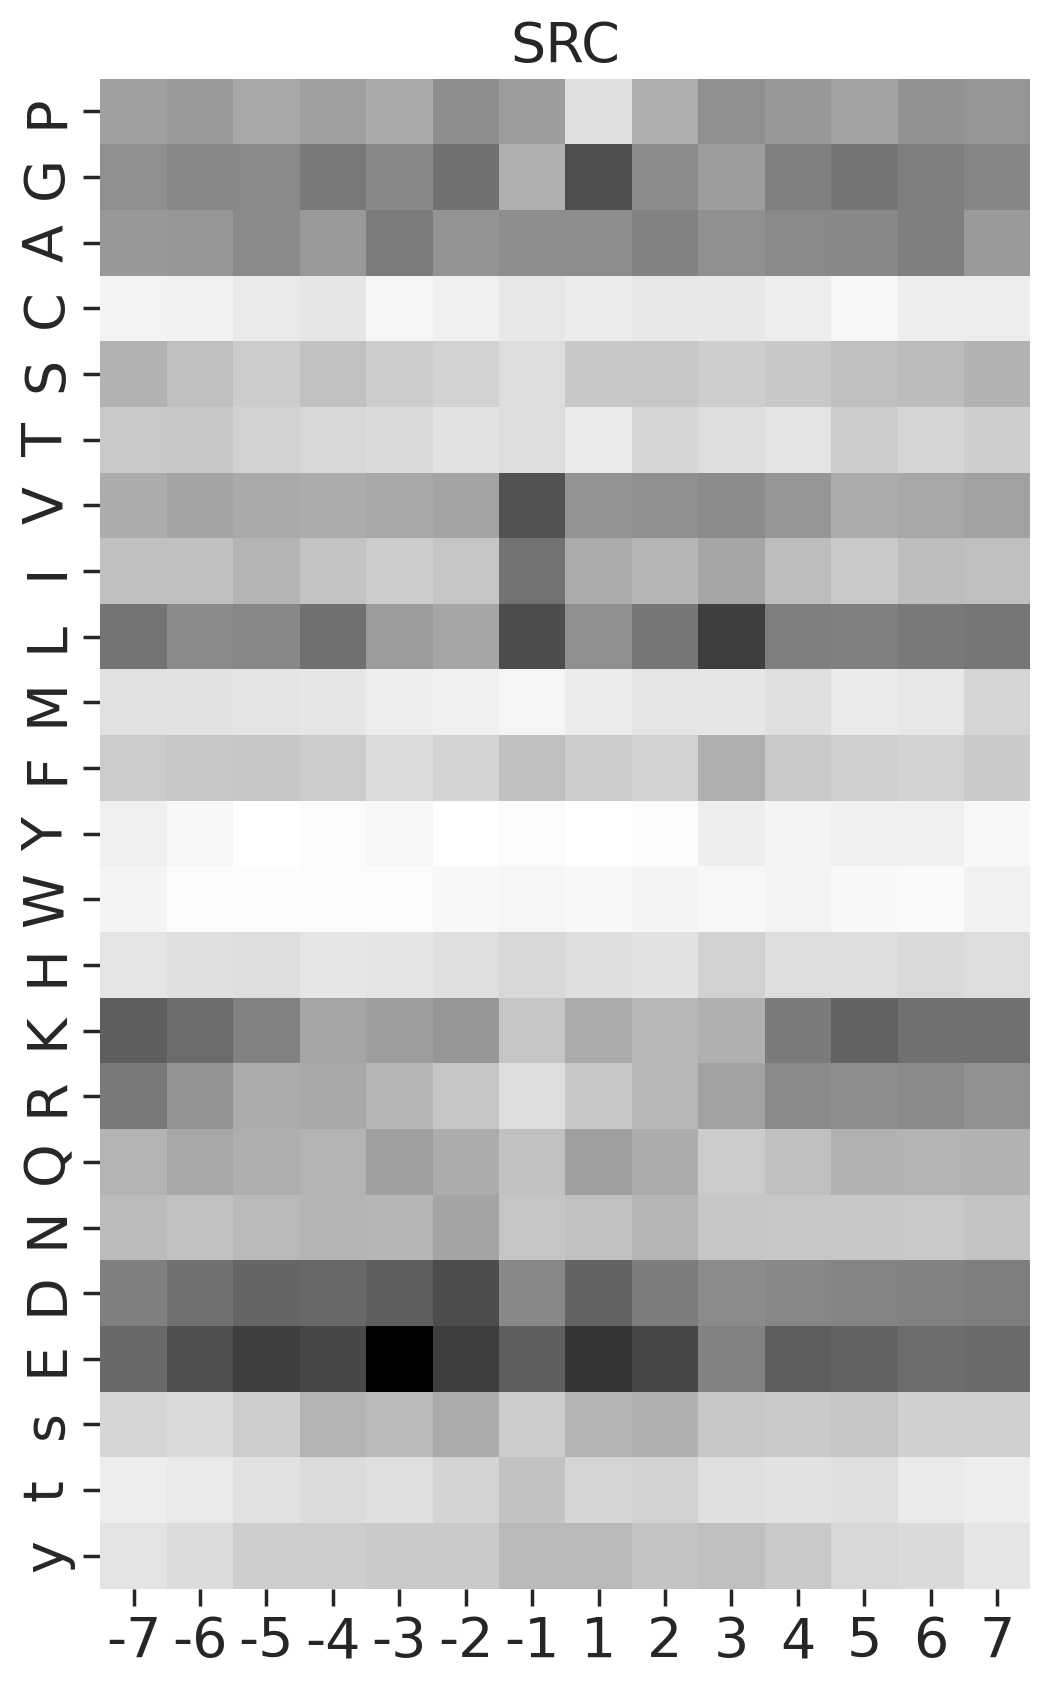

In [ ]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

for k in kinase_list:
    df_k = df.query(f'kinase=="{k}"')
    df_k = df_k.drop_duplicates(subset='SUB').reset_index()

    paper,full = get_freq(df_k)

    plot_heatmap2(full.drop(columns=[0]),f'{k}',figsize=(6,10))
    plt.show()
    plt.close()
        
    break

    # if you want to generate and save all of figures, uncomment below
    # plt.savefig(f'fig/{k}.png',bbox_inches='tight', pad_inches=0.3)
    # plt.close()

## Generate all figures

Uncomment plt.savefig to save figures

  0%|          | 0/289 [00:00<?, ?it/s]

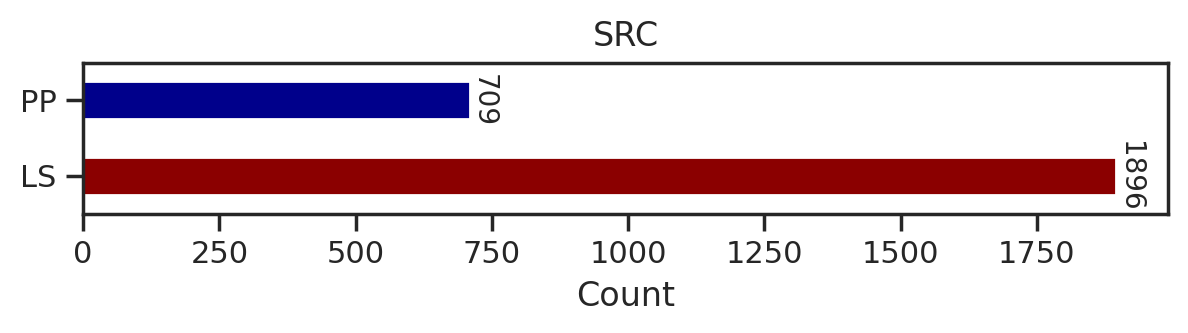

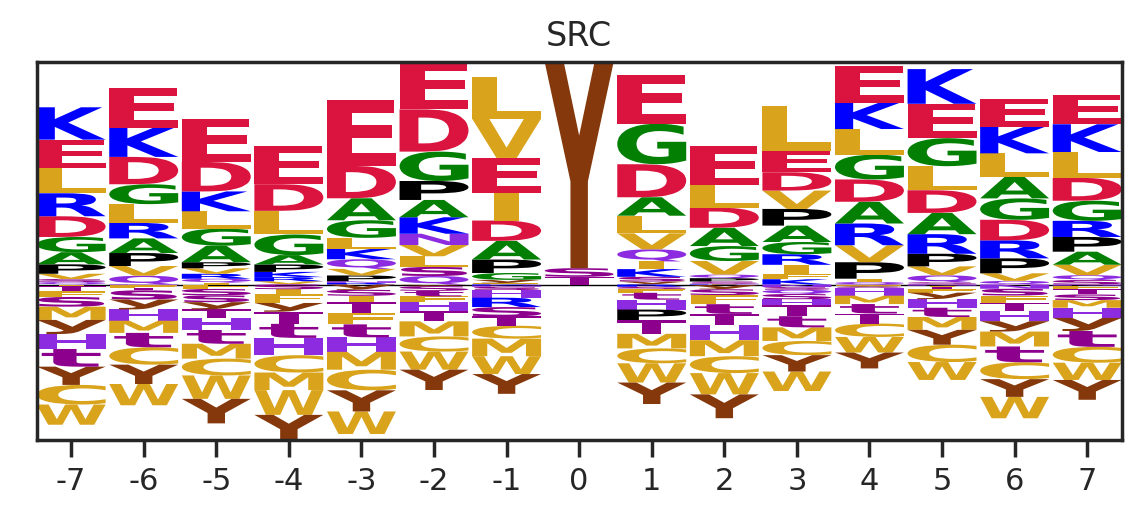

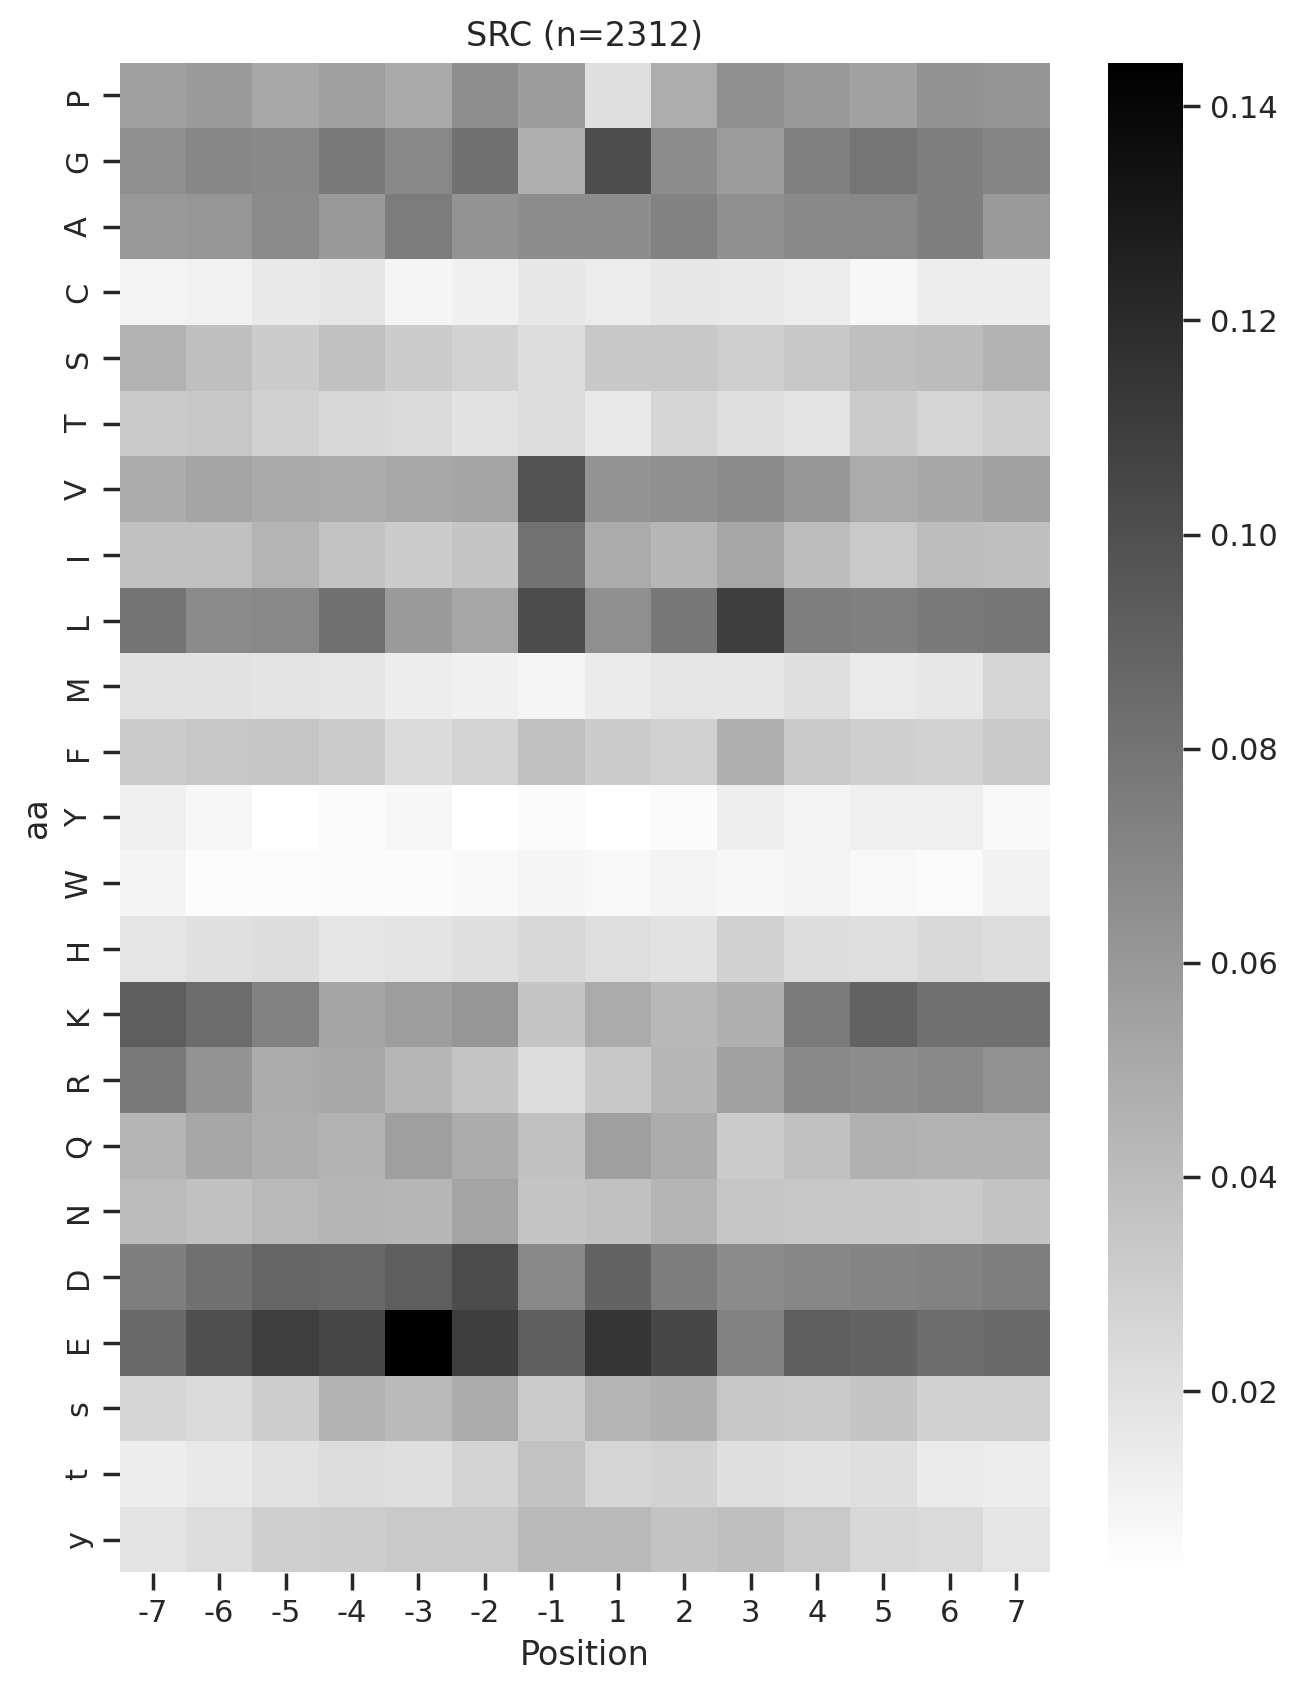

  0%|          | 0/289 [00:02<?, ?it/s]


In [ ]:
sns.set(rc={"figure.dpi":200, 'savefig.dpi':200})
sns.set_context('notebook')
sns.set_style("ticks")

for k in tqdm(cnt.index,total=len(cnt)):
    
    df_k = df.query(f'kinase=="{k}"')
    
    plot_count(df_k,k)
    # plt.savefig(f'fig/count/{k}.png',bbox_inches='tight', pad_inches=0.1)
    plt.show() # if visualize in jupyter notebook, uncheck the savefig
    plt.close()
    
    
    df_k = df_k.drop_duplicates(subset='SUB').reset_index()
    
    paper,full = get_freq(df_k)

    get_logo2(full, k)
    # plt.savefig(f'fig/logo/{k}.png',bbox_inches='tight', pad_inches=0.3)
    plt.show()
    plt.close()

    plot_heatmap(full.drop(columns=[0]),f'{k} (n={len(df_k)})',figsize=(7.5,10))
    # plt.savefig(f'fig/heatmap/{k}.png',bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()
    # break
    break

## Combine figures for pdf

In [ ]:
def combine_images_vertically(image_paths, output_path):
    images = [Image.open(image_path).convert('RGBA') for image_path in image_paths]
    
    total_width = max(image.width for image in images)
    total_height = sum(image.height for image in images)

    combined_image = Image.new('RGBA', (total_width, total_height))

    y_offset = 0
    for image in images:
        combined_image.paste(image, (0, y_offset), image)
        y_offset += image.height

    combined_image.save(output_path)

Uncomment below to run

In [ ]:
# folders = ["fig/count", "fig/logo", "fig/heatmap"]
# for k in tqdm(cnt.index,total=len(cnt)):
#     filename = f"{k}.png"
#     image_paths = [os.path.join(folder, filename) for folder in folders]
#     output_path = f"fig/combine/{k}.png"
    
#     combine_images_vertically(image_paths, output_path)
#     # break

## Get PSSM data of CDDM

In [ ]:
for i,k in enumerate(cnt.index):
    
    df_k = df.query(f'kinase=="{k}"')
    df_k = df_k.drop_duplicates(subset='SUB').reset_index()
    
    paper,full = get_freq(df_k)

    melt = full.drop(columns = [0]).reset_index().melt(id_vars=['aa'], value_name=k, var_name='Position')
    melt['substrate']=melt['Position'].astype(str)+ melt['aa']

    position_0 = full[0][['s','t','y']].reset_index().rename(columns={0:k})
    position_0['substrate'] = '0'+position_0['aa']

    if i ==0:
        first = pd.concat([melt,position_0])[['substrate',k]].set_index('substrate')
    else:
        k = pd.concat([melt,position_0])[['substrate',k]].set_index('substrate')
        data = pd.concat([first,k],axis=1)
        first = data.copy()
    
    # break

In [ ]:
data = data.T

data.index = data.index.rename('kinase')

To save

In [ ]:
# data.to_csv('supp/CDDM.csv')

# data.to_parquet('ks_main.parquet')

## Get specialized CDDM data for all-capital substrates
>combine s,t,y to S,T,Y

In [ ]:
# List of suffixes
suffixes = ['S', 'T', 'Y']

for suffix in suffixes:
    for i in range(-7, 8):  # looping from -7 to 7
        if i == 0:  # Skip 0
            continue
        
        upper_col = f"{i}{suffix}"  # e.g., -7S
        lower_col = f"{i}{suffix.lower()}"  # e.g., -7s
        data[upper_col] = data[upper_col] + data[lower_col]
        data.drop(lower_col, axis=1,inplace=True)  # Drop the lowercase column after combining

In [ ]:
data.columns[data.columns.str.contains('S')]

Index(['-7S', '-6S', '-5S', '-4S', '-3S', '-2S', '-1S', '1S', '2S', '3S', '4S',
       '5S', '6S', '7S'],
      dtype='object', name='substrate')

In [ ]:
# make sure the "s" in positions other than 0 is deleted from the columns
data.columns[data.columns.str.contains('s')]

Index(['0s'], dtype='object', name='substrate')

In [ ]:
# Make sure very position's sum is 1
data.loc[:,data.columns.str.contains('-7')].sum(1).sort_values()

kinase
DDR2      1.0
NEK11     1.0
MSK1      1.0
TEK       1.0
NIM1      1.0
         ... 
CAMK2G    1.0
PKG2      1.0
MELK      1.0
NEK1      1.0
TLK2      1.0
Length: 289, dtype: float64

In [ ]:
data = data.rename(columns={'0s':'0S','0t':'0T','0y':'0Y'})

In [ ]:
data.index = data.index.rename('kinase')

To save

In [ ]:
# data.to_parquet('ks_main_upper.parquet')
# data.to_csv('supp/CDDM_upper.csv')

## Plot other kinases (mutated, lipid kinase, isoforms)
> kinases not on kinome tree

In [ ]:
cnt_other = df.query('on_tree==0').kinase.value_counts()

cnt_other = cnt_other[cnt_other>100]

In [ ]:
others = cnt_other.index.tolist()+['LYN','ABL1','RET','FGFR3','PDGFRA','ALK',
                          'EGFR','KIT','MET','PKCB','BRAF','PKG1'] # BRAF is less than 100

Uncheck savefig to save figures

  0%|          | 0/36 [00:00<?, ?it/s]

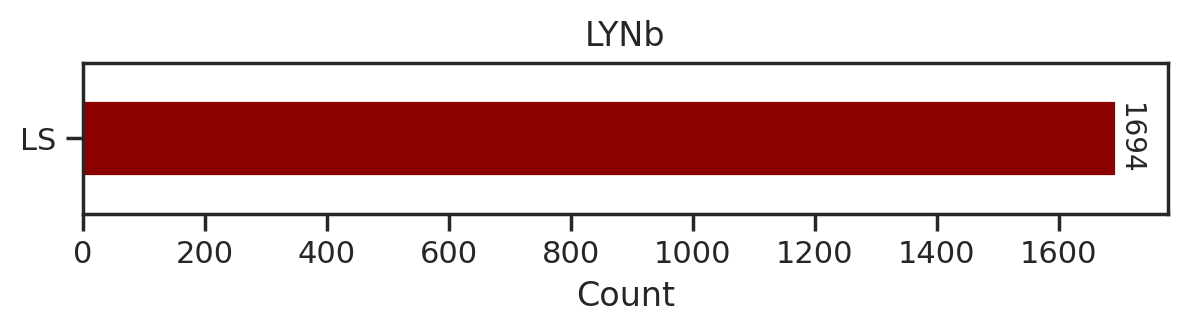

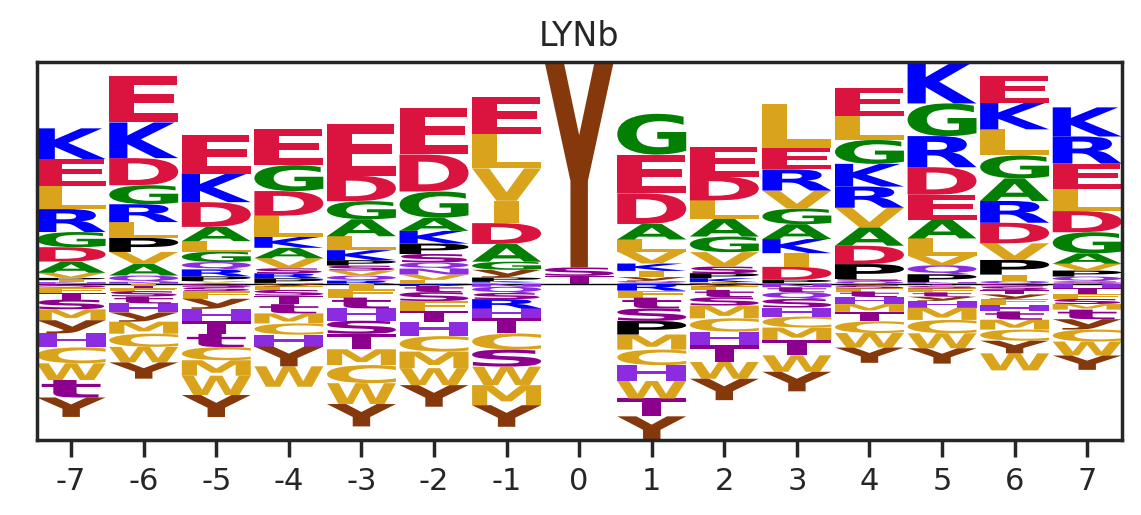

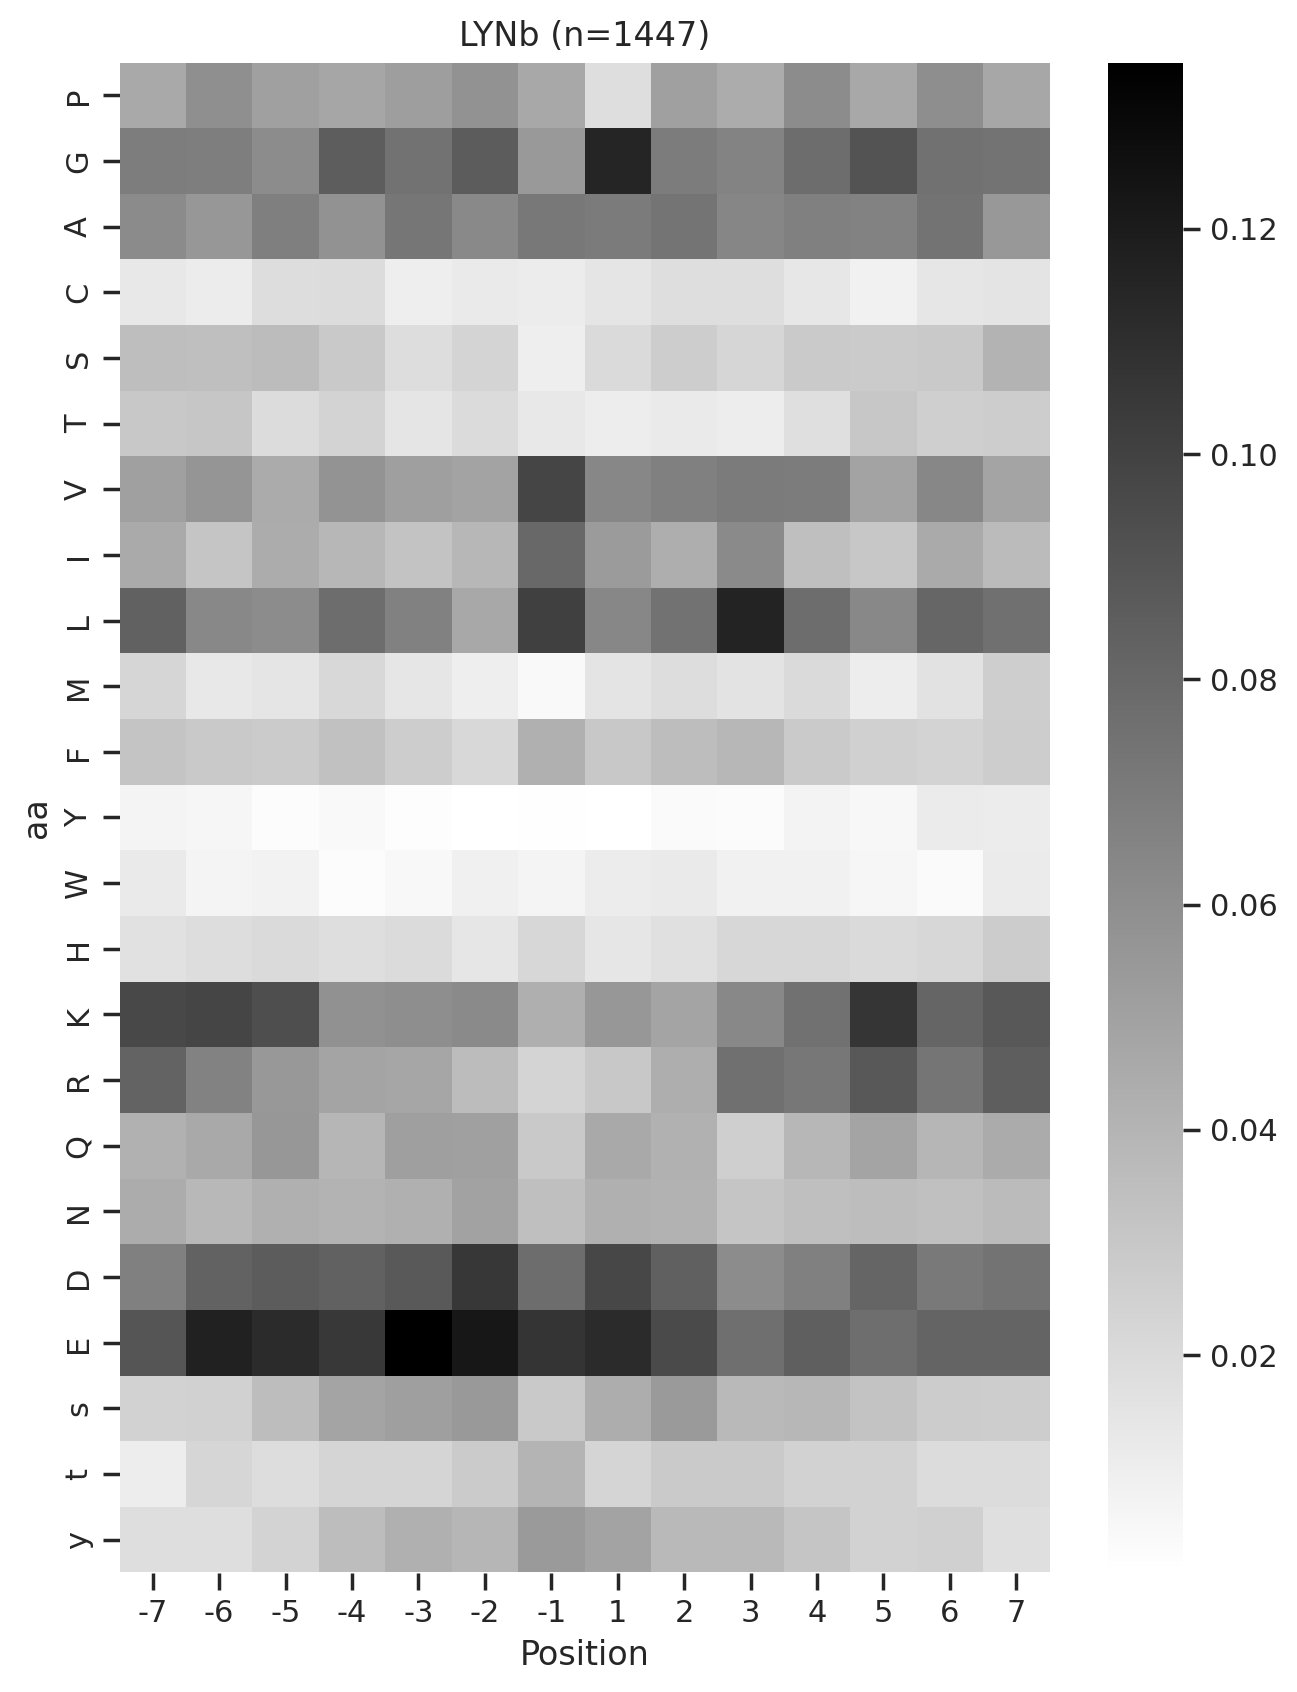

  0%|          | 0/36 [00:01<?, ?it/s]


In [ ]:
for k in tqdm(others,total=len(others)):
    df_k = df.query(f'kinase=="{k}"')
    
    plot_count(df_k,k)
    # plt.savefig(f'fig_others/count/{k.replace("/", "_")}.png',bbox_inches='tight', pad_inches=0.1)
    plt.show() # if visualize in jupyter notebook, uncheck the savefig
    plt.close()
    
    df_k = df_k.drop_duplicates(subset='SUB').reset_index()
    
    paper,full = get_freq(df_k)
    
    get_logo2(full,k)
    # plt.savefig(f'fig_others/logo/{k.replace("/", "_")}.png',bbox_inches='tight', pad_inches=0.3)
    plt.show()
    plt.close()
    
    plot_heatmap(full.drop(columns=[0]),f'{k} (n={len(df_k)})',figsize=(7.5,10))
    # plt.savefig(f'fig_others/heatmap/{k.replace("/", "_")}.png',bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()
    
    break

## Combine the figures for pdf

Uncomment below to run

In [ ]:
# folders = ["fig_others/count", "fig_others/logo", "fig_others/heatmap"]
# for k in tqdm(others,total = len(others)):
#     k = k.replace("/", "_")
    
#     filename = f"{k}.png"
    
#     image_paths = [os.path.join(folder, filename) for folder in folders]
    
#     output_path = f"fig_others/combine/{k}.png"
    
#     combine_images_vertically(image_paths, output_path)
#     # break

## Get the PSSMs of other kinases

In [ ]:
for i,k in enumerate(others):
    df_k = df.query(f'kinase=="{k}"')
    df_k = df_k.drop_duplicates(subset='SUB').reset_index()
    
    paper,full = get_freq(df_k)
    
    melt = full.drop(columns = [0]).reset_index().melt(id_vars=['aa'], value_name=k, var_name='Position')
    melt['substrate']=melt['Position'].astype(str)+ melt['aa']

    position_0 = full[0][['s','t','y']].reset_index().rename(columns={0:k})
    position_0['substrate'] = '0'+position_0['aa']

    if i ==0:
        first = pd.concat([melt,position_0])[['substrate',k]].set_index('substrate')
    else:
        k = pd.concat([melt,position_0])[['substrate',k]].set_index('substrate')
        data = pd.concat([first,k],axis=1)
        first = data.copy()

In [ ]:
data = data.T

data.index = data.index.rename('kinase')

To save:

In [ ]:
# data.to_csv('supp/CDDM_others.csv')

# data.to_parquet('ks_others.parquet')